## Guassian Classifier (2D visualization)

In [1]:
# Importing necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use(["science","no-latex"])
figsize_val = (8,8)

### Guassian distribution for multi variables
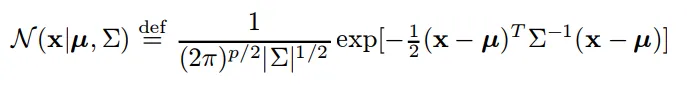

In [2]:
# Function to Apply normal distribution formula for a particular N dimensional point
def norm_dis(x,mean,cov_mat,num_c):
    '''
    INPUTS:
        x is a vector representing the number of features (dimensions) => numpy array
        mean is the mean of N distributions => 1 D (N length) numpy array
        cov_mat is the covariance matrix => N-dimensional numpy array
        num_c is the number of dimensions => integer
    OUTPUT:
        returns the value of normal distribution at given x for the corresponding mean and covariance
    '''
    den = (1/((2*np.pi)**(num_c/2))*(np.linalg.det(cov_mat)**(0.5)))
    diff_x_mean = np.subtract(x,mean)
    exp_val = np.matmul(np.matmul(np.transpose(diff_x_mean),np.linalg.inv(cov_mat)),(diff_x_mean))
    return den*(np.exp((-0.5)*exp_val))

# Function to Iterate over the points to get the overall distribution
def iter_norm_dis(x1,y1,num_c,cov_mat,mean):
    '''
    INPUT:
        x1,y1 are 2D values of range whose meshgrid is to be created to evaluate the function
        at multiple points
        => numpy arrays
    OUTPUT:
        returns an N-dimensional (here 2 D mostly) with the values from the norm_dist function
    '''
    [x1,y1] = np.meshgrid(x1,y1,indexing="ij")
    z = np.zeros((x1.shape[0],y1.shape[1]))
    
    # for each location, find the probability value and store it in z
    for i in range(x1.shape[0]):
        for j in range(y1.shape[1]):
            z[i][j] = norm_dis(np.array([x1[i][j],y1[i][j]]),mean,cov_mat,num_c)
    return (z,x1,y1)

In [9]:
# Configuring the number of classes (Currently works only for 2D)
number_of_classes = 2
mean = np.zeros(number_of_classes)

### Classes are uncorrelated and their auto-correlation values are same
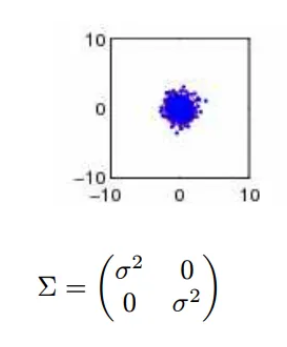

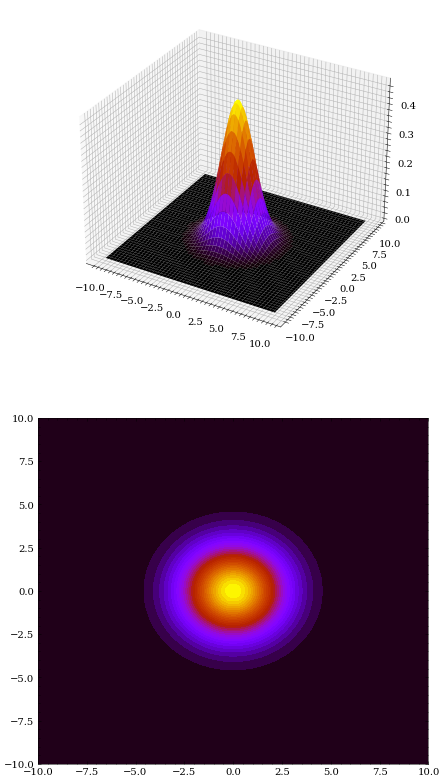

In [10]:
scaling_factor = 3
covar_matrix = scaling_factor*np.identity(number_of_classes)
x1 = np.linspace(-10,10,100)
x2 = np.linspace(-10,10,100)

#print(norm_dis(np.array([xx1[i],yx2[j]]),mean,covar_matrix,number_of_classes)) #= 0.2584318220246485

fig = plt.figure(figsize=(7,14))
z,x,y = iter_norm_dis(x1,x2,number_of_classes,covar_matrix,mean)
ax = fig.add_subplot(2, 1, 1, projection='3d')
ax.plot_surface(x,y,z,cmap="gnuplot")
ax = fig.add_subplot(2, 1, 2)
ax.contourf(x,y,z,40,cmap="gnuplot")
# plt.Countor(x,y,z)
# for i in range(2):
#     ax[i].set_xlabel("X1")
#     ax[i].set_ylabel("X2")
#     ax[i].set_zlabel("Z")
plt.savefig("Variables_uncorrelated.png",dpi=500)
plt.show()

### Classes are uncorrelated and their auto-correlation values are different
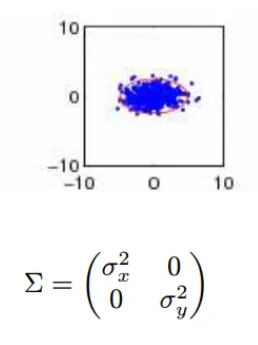

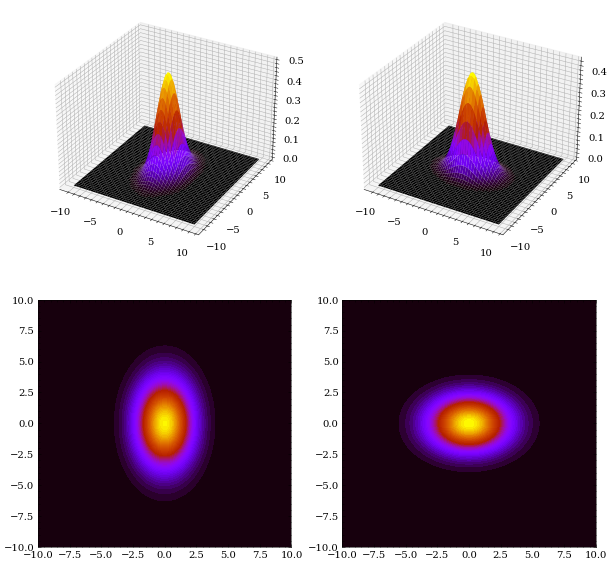

In [12]:
covar_matrix = np.identity(number_of_classes)

x1 = np.linspace(-10,10,100)
x2 = np.linspace(-10,10,100)

# Changing Mean
mean = [0]*number_of_classes

fig = plt.figure(figsize=(10,10))
# fig , ax = plt.subplots(1,2, figsize=(16,8),subplot_kw=dict(projection="3d"))

# Editing the auto-correlation values
covar_matrix[0][0] = 2 # x1 autocorrelation value
covar_matrix[1][1] = 5 # x2 autocorrelation value

z,x,y = iter_norm_dis(x1,x2,number_of_classes,covar_matrix,mean)

ax = fig.add_subplot(2,2,1,projection="3d")
ax.plot_surface(x,y,z,cmap="gnuplot")

ax = fig.add_subplot(2,2,3)
ax.contourf(x,y,z,50,cmap="gnuplot")

# Editing the auto-correlation values
covar_matrix[0][0] = 4 # x1 autocorrelation value
covar_matrix[1][1] = 2 # x2 autocorrelation value

ax = fig.add_subplot(2,2,2,projection="3d")
z,x,y = iter_norm_dis(x1,x2,number_of_classes,covar_matrix,mean)
ax.plot_surface(x,y,z,cmap="gnuplot")

ax = fig.add_subplot(2,2,4)
ax.contourf(x,y,z,50,cmap="gnuplot")

# for i in range(2):
#     ax[i].set_xlabel("X1")
#     ax[i].set_ylabel("X2")
#     ax[i].set_zlabel("Z")

plt.savefig("Variables_uncorrelated_but_nonequal_autocorr.png",dpi=400)
plt.show()

### Classes are correlated
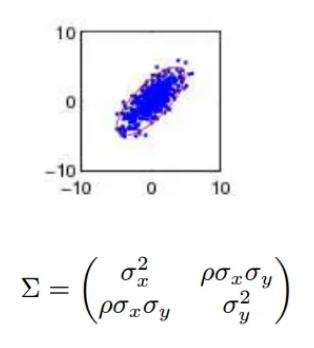

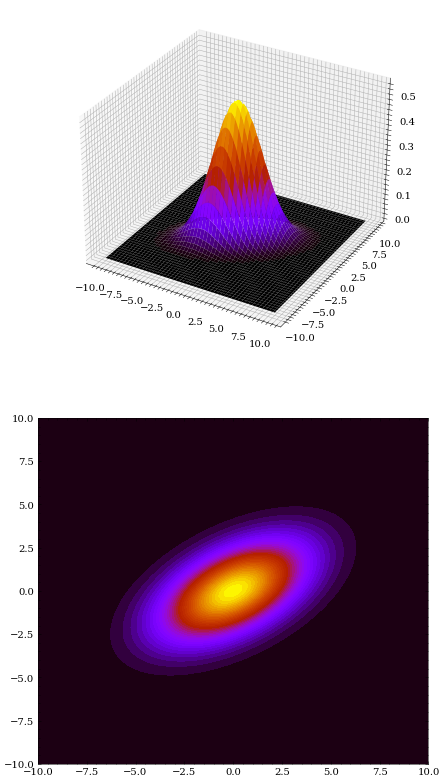

In [13]:
covar_matrix = np.zeros((number_of_classes,number_of_classes))

# Editing the covariance matrix
covar_matrix[0][0] = 5
covar_matrix[0][1] = 1
covar_matrix[1][0] = 3
covar_matrix[1][1] = 3

x1 = np.linspace(-10,10,100)
x2 = np.linspace(-10,10,100)

z,x,y = iter_norm_dis(x1,x2,number_of_classes,covar_matrix,mean)

fig = plt.figure(figsize=(7,14))
ax = fig.add_subplot(2,1,1,projection='3d')
ax.plot_surface(x,y,z,cmap="gnuplot")

ax = fig.add_subplot(2,1,2)
ax.contourf(x,y,z,50,cmap="gnuplot")

# ax.set_xlabel("X1")
# ax.set_ylabel("X2")
# ax.set_zlabel("Z")
plt.savefig("Variables_correlated.png",dpi=400)
plt.show()

### Fancy animation stuff
Using matplotlib.animate

In [14]:
from matplotlib.animation import FuncAnimation, PillowWriter

#### Changing the mean value

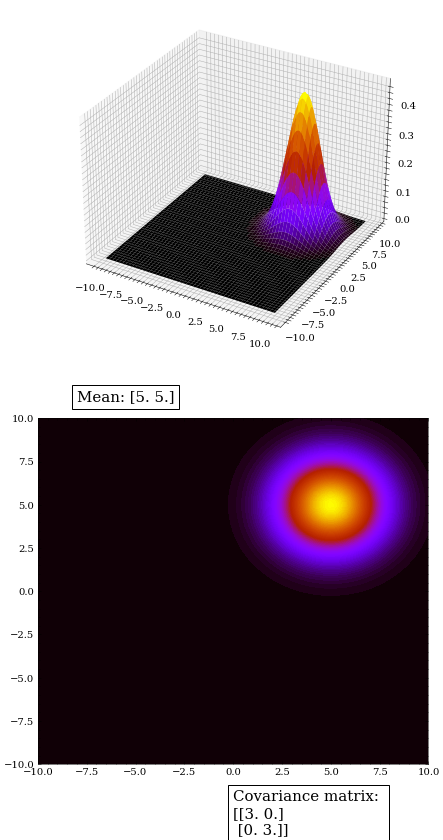

In [22]:
# ranges of input values
x1 = np.linspace(-10,10,100)
x2 = np.linspace(-10,10,100)

# initial values
scaling_factor = 3
covar_matrix = scaling_factor*np.identity(number_of_classes)
mean = np.zeros(number_of_classes)
# z,x,y = iter_norm_dis(x1,x2,number_of_classes,covar_matrix,mean)

# Start of plotting
fig = plt.figure(figsize=(7,14))

ax3d = fig.add_subplot(2,1,1,projection="3d")
# ax3d.plot_surface(x,y,z,cmap="gnuplot")

ax2d = fig.add_subplot(2,1,2)
ax2d.axis([-15, 15, -15, 15])
# ax2d.contourf(x,y,z,50,cmap="gnuplot")

mean_vals = np.linspace(-5,5,30)

def animate(i):
    global covar_matrix, number_of_classes, mean_vals
    ax2d.clear()
    ax3d.clear()
    mean_i = np.array([mean_vals[i]]*number_of_classes)
    z,x,y = iter_norm_dis(x1,x2,number_of_classes,covar_matrix,mean_i)
    ax2d.contourf(x,y,z,100,cmap="gnuplot")
    ax3d.plot_surface(x,y,z,cmap="gnuplot")
    ax2d.text(-8,11, f'Mean: {mean_i}',fontsize=15, bbox={'facecolor': 'white','pad': 5})
    ax2d.text(0,-14, f'Covariance matrix: \n{covar_matrix}',fontsize=15, bbox={'facecolor': 'white','pad': 5})

ani = FuncAnimation(fig,animate,frames=len(mean_vals),interval=50,repeat=False)
ani.save("shifting_mean.gif",dpi=300,writer=PillowWriter(fps=24))

#### Changing the Covariance matrix

In [24]:
values = [np.array([[1,0],[0,1]]),np.array([[2,0],[0,4]]),np.array([[4,0],[0,2]]),np.array([[1,0.5],[0.75,1]]),np.array([[1,0.75],[0.5,1]])]

mean = np.zeros(number_of_classes)
def animate(i):
    global covar_matrix, number_of_classes, values, mean
    ax2d.clear()
    ax3d.clear()
    covar_matrix = values[i]
    z,x,y = iter_norm_dis(x1,x2,number_of_classes,covar_matrix,mean)
    ax2d.contourf(x,y,z,100,cmap="gnuplot")
    ax3d.plot_surface(x,y,z,cmap="gnuplot")
    ax2d.text(-7,-14, f'Mean: {mean}',fontsize=15, bbox={'facecolor': 'white','pad': 5})
    ax2d.text(0,-14, f'Covariance matrix: \n{covar_matrix}',fontsize=15, bbox={'facecolor': 'white','pad': 5})

ani = FuncAnimation(fig,animate,frames=len(values),interval=500,repeat=False)
ani.save("shifting_covariance.gif",dpi=300,writer=PillowWriter(fps=1))